In [13]:
import matplotlib.pyplot as plt
import json
import os

In [14]:
def plot_metrics(train_accs, train_losses, val_accs, val_losses, plt_show=False, out="metrics.png"):
    '''
    Helper function for building a regular matplotlib plot.
    '''
    fig, ax1 = plt.subplots(figsize=(16,9))
    
    color = 'tab:red'
    ax1.plot(range(len(train_losses)), train_losses, c=color, alpha=0.25, label="Train Loss")
    ax1.plot(range(len(val_losses)), val_losses, c="red", label="Val. Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Avg. Cross-Entropy Loss", c=color)
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(range(len(train_accs)), train_accs, c=color, label="Train Acc.", alpha=0.25)
    ax2.plot(range(len(val_accs)), val_accs, c="blue", label="Val. Acc.")
    ax2.set_ylabel("Accuracy", c=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(-0.01,1.01)
    
    fig.tight_layout()
    ax1.legend(loc="center")
    ax2.legend(loc="center right")

    if plt_show:
        plt.show()
    else:
        plt.savefig(out)

    plt.clf()

In [20]:
def plot_metric_from_folder(dir):
    metrics = None
    with open(dir, "r") as f:
        m = json.load(f)
        if "metrics" in m.keys():
            metrics = m['metrics']
            
    if metrics:
        epochs = list(metrics.keys())
        train_loss = [metrics[epoch]['train_loss'] for epoch in epochs]
        val_loss = [metrics[epoch]['val_loss'] for epoch in epochs]
        train_acc = [metrics[epoch]['train_acc'] for epoch in epochs]
        val_acc = [metrics[epoch]['val_acc'] for epoch in epochs]

        plot_metrics(train_acc, train_loss, val_acc, val_loss, plt_show=True)

tiny-imagenet_reg_20250311_030753/info.json


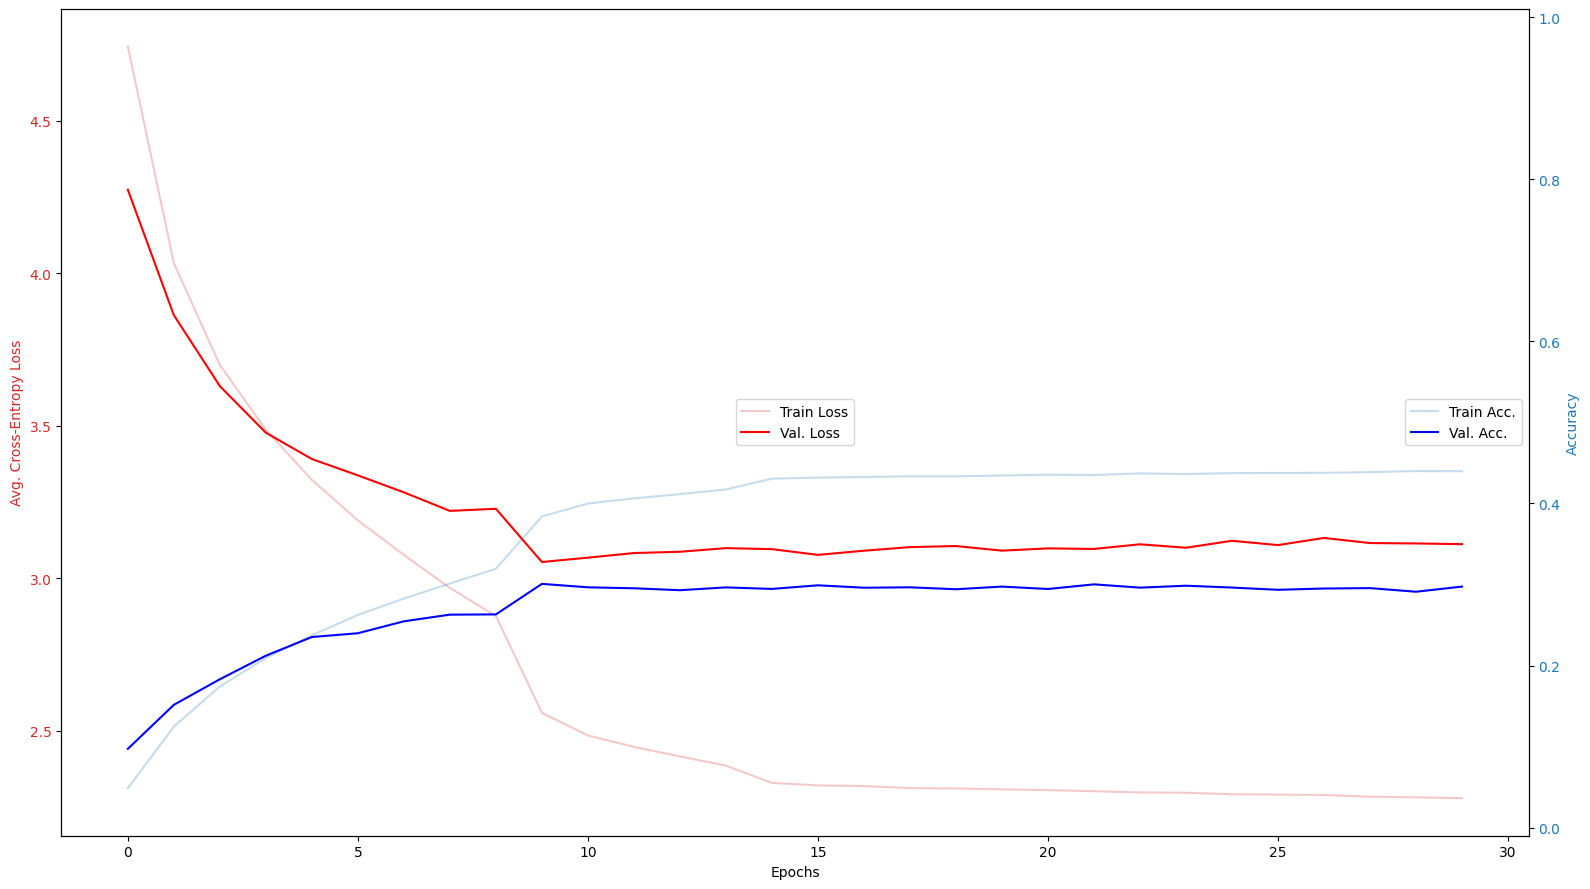

tiny-imagenet_reg_20250311_032209/info.json


<Figure size 640x480 with 0 Axes>

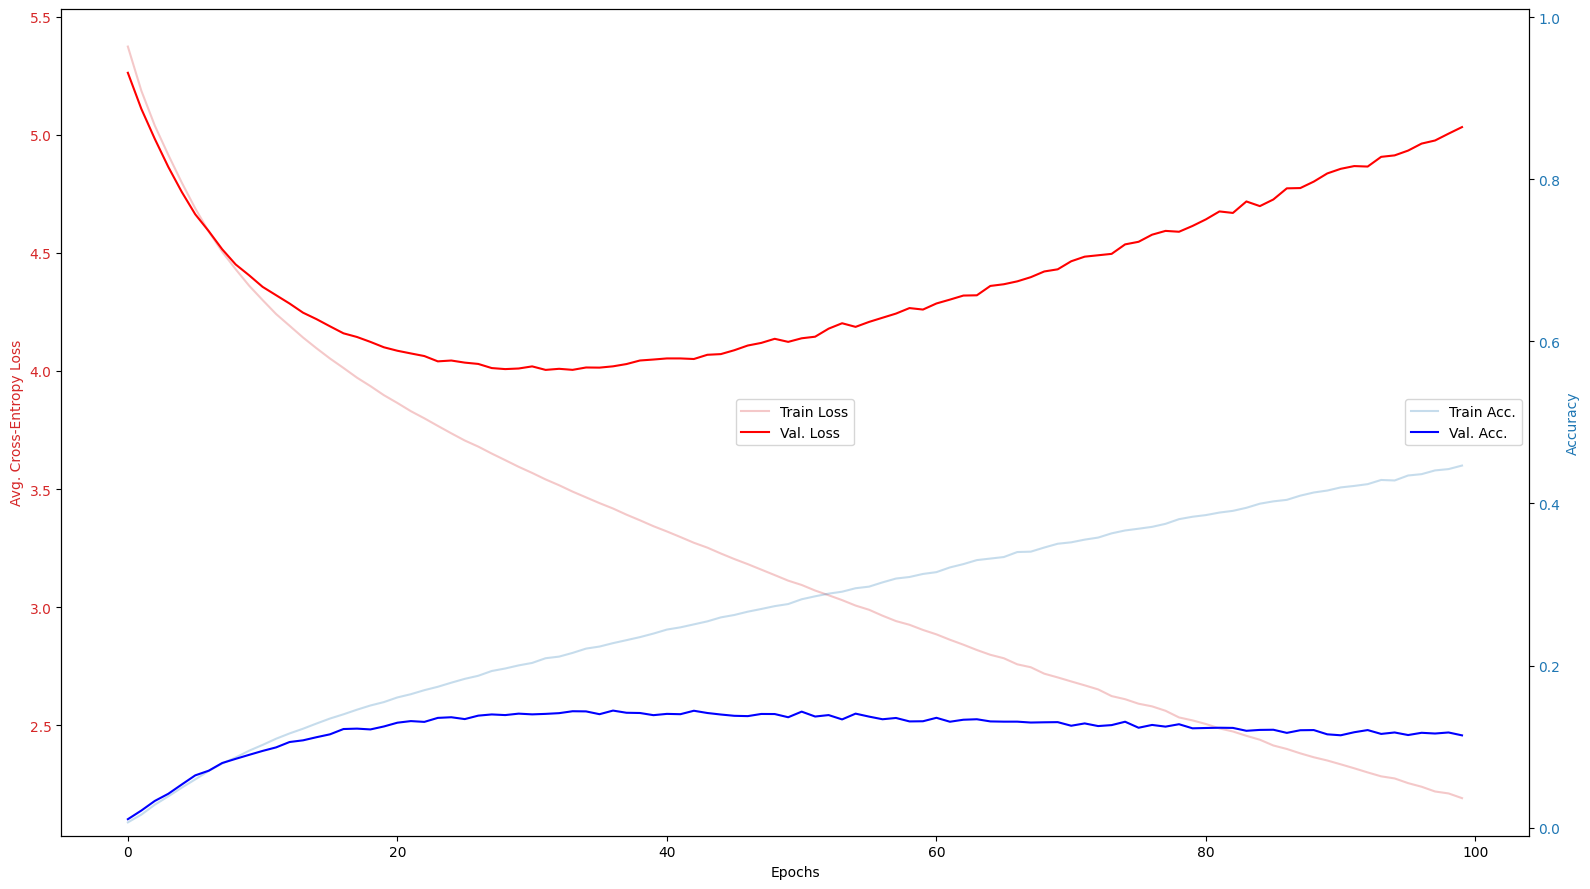

tiny-imagenet_reg_20250311_032225/info.json


<Figure size 640x480 with 0 Axes>

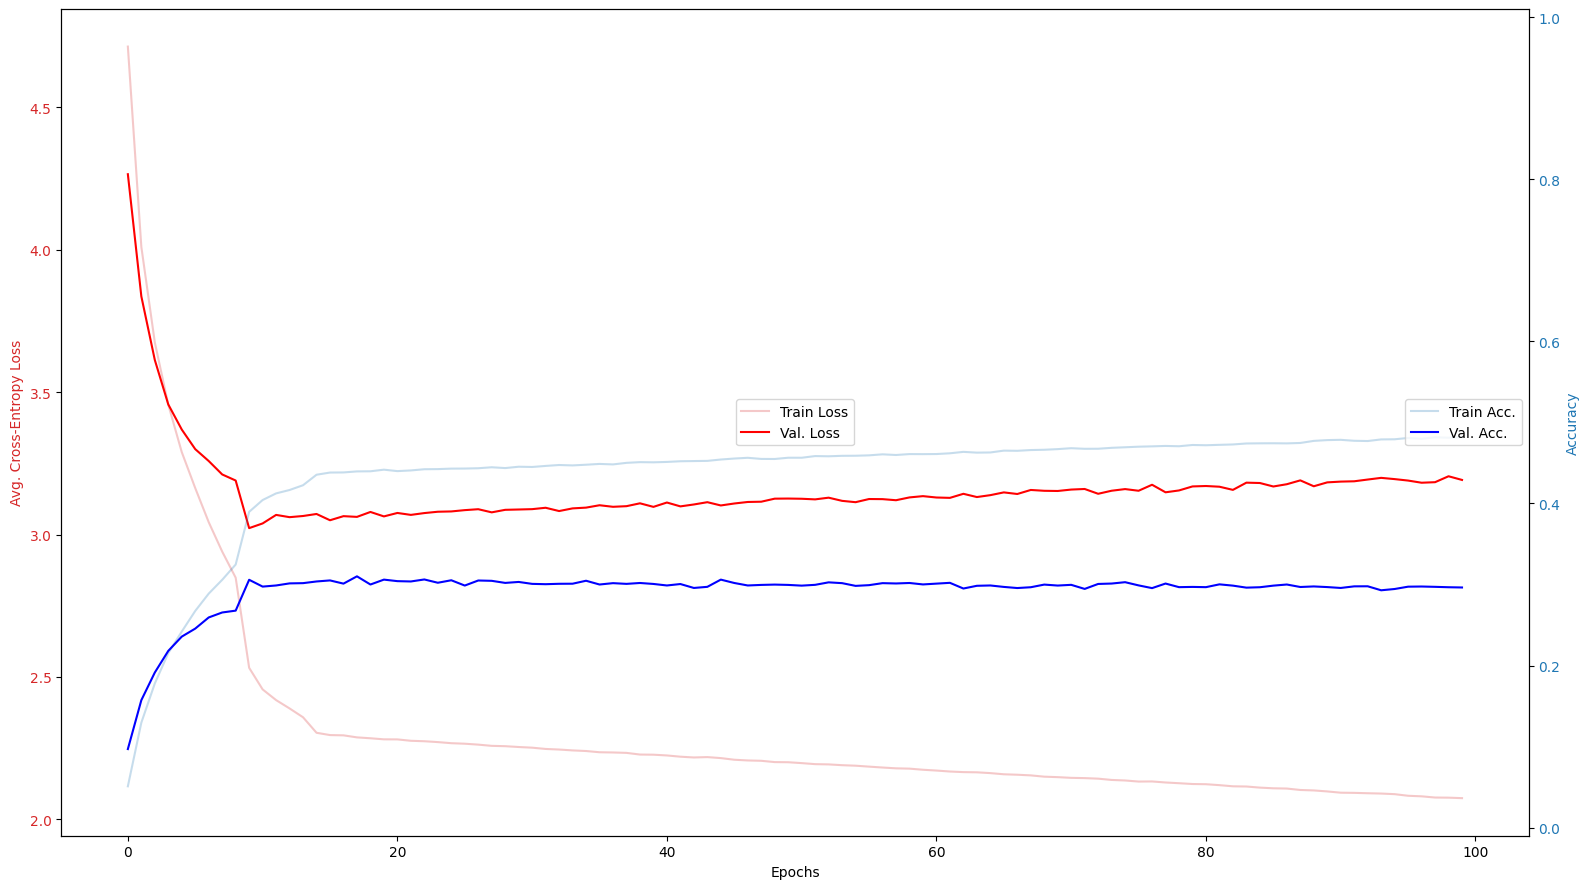

tiny-imagenet_reg_20250311_032328/info.json


<Figure size 640x480 with 0 Axes>

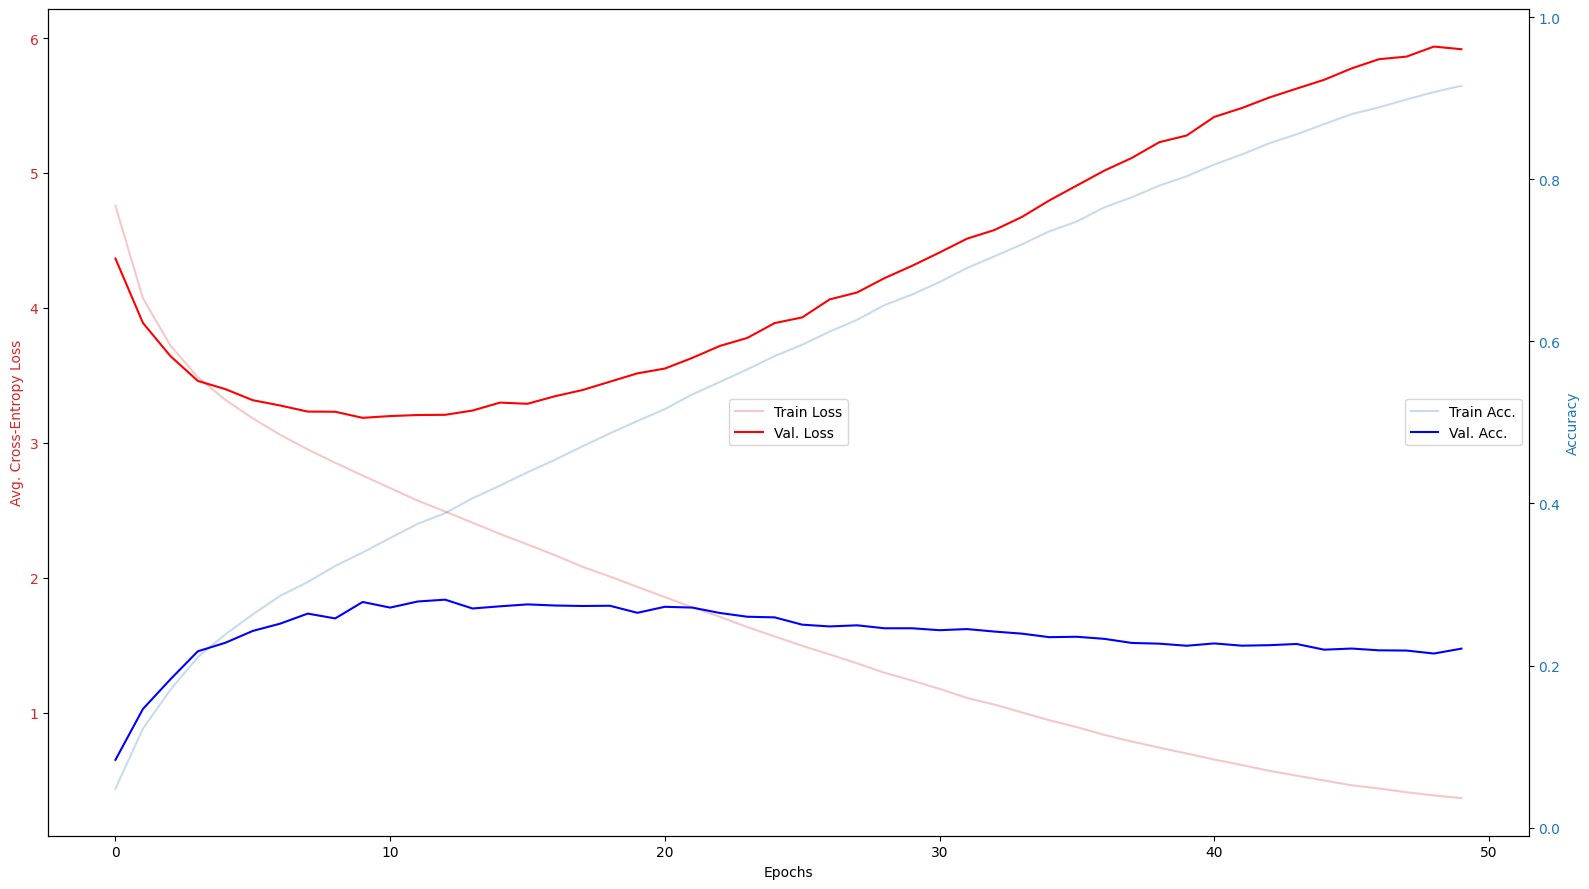

tiny-imagenet_reg_20250311_163639/info.json
tiny-imagenet_reg_20250311_170016_base_01_nosched_e50_b512/info.json


<Figure size 640x480 with 0 Axes>

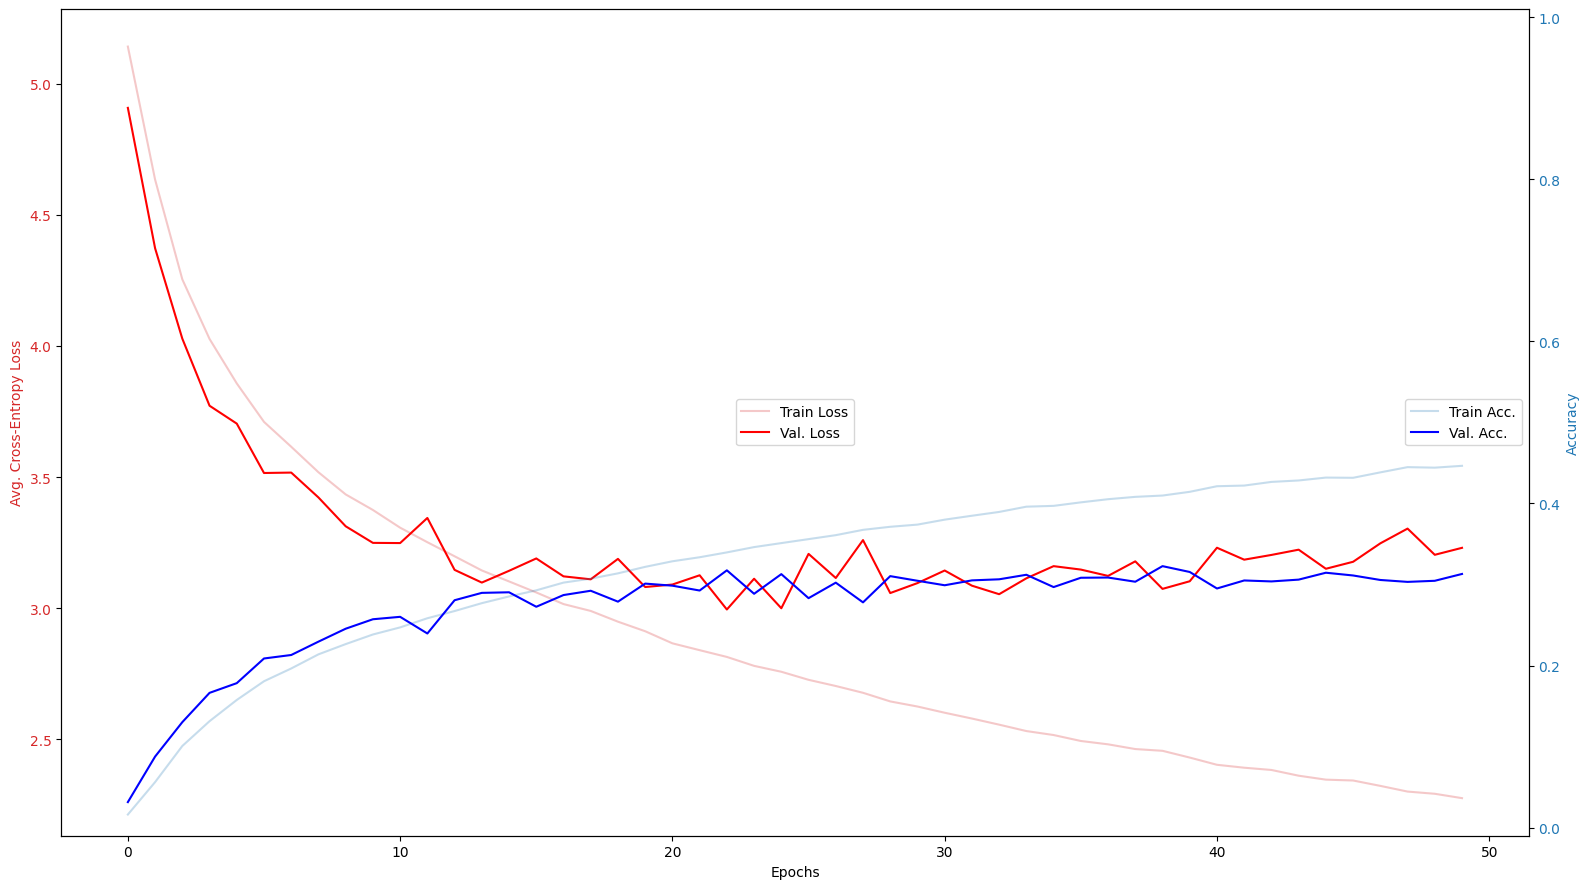

tiny-imagenet_reg_20250311_185019_base_001_nosched_e50_b512/info.json


<Figure size 640x480 with 0 Axes>

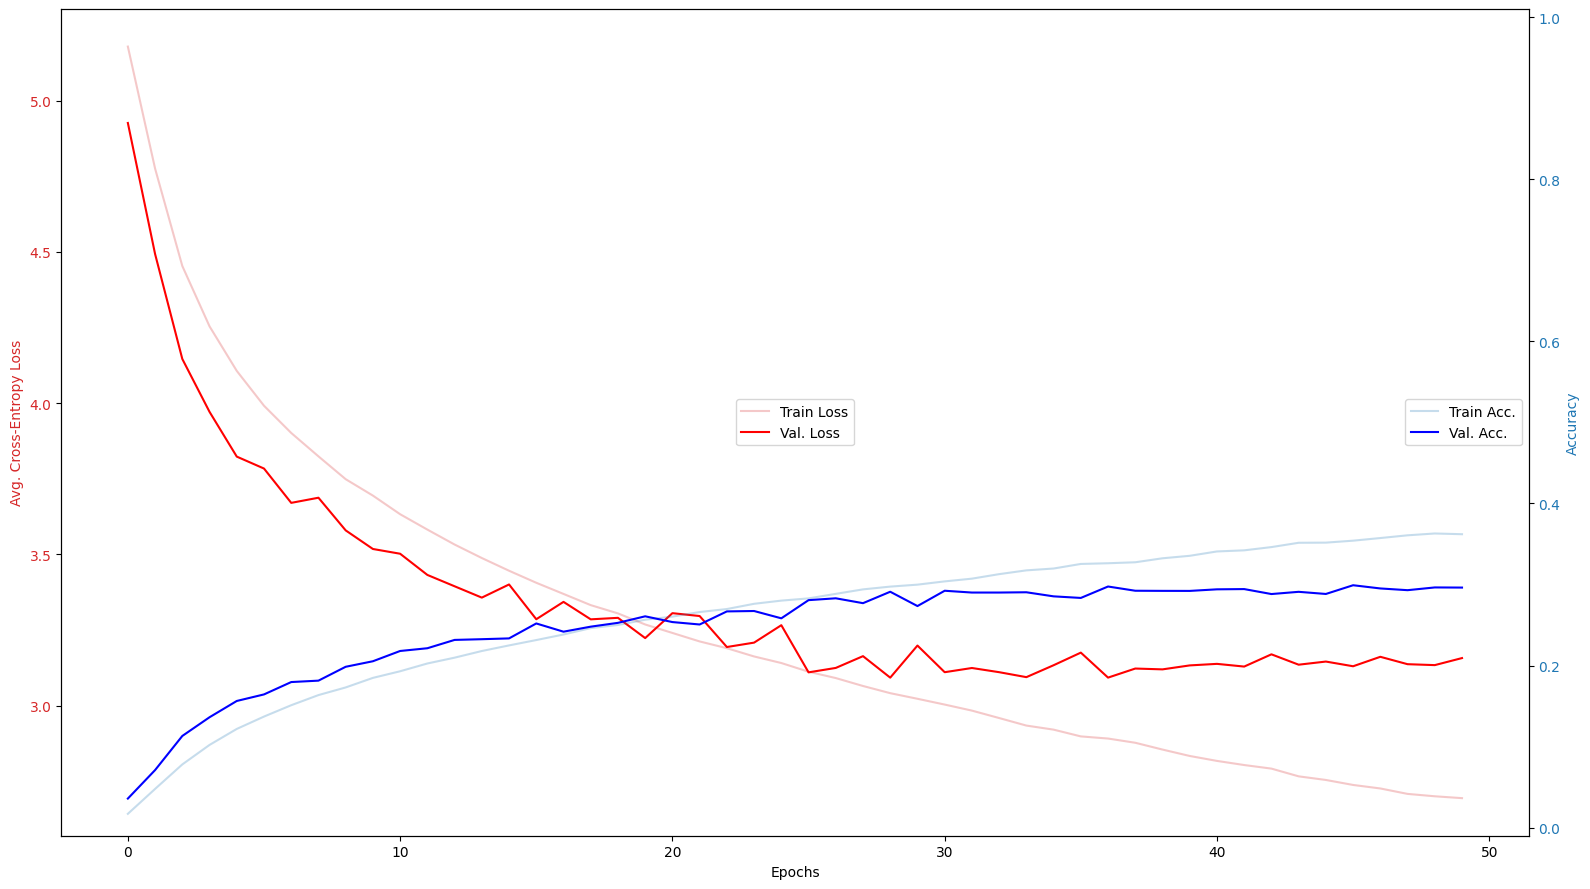

tiny-imagenet_reg_20250311_193542_base_001_sched_b256_e50/info.json


<Figure size 640x480 with 0 Axes>

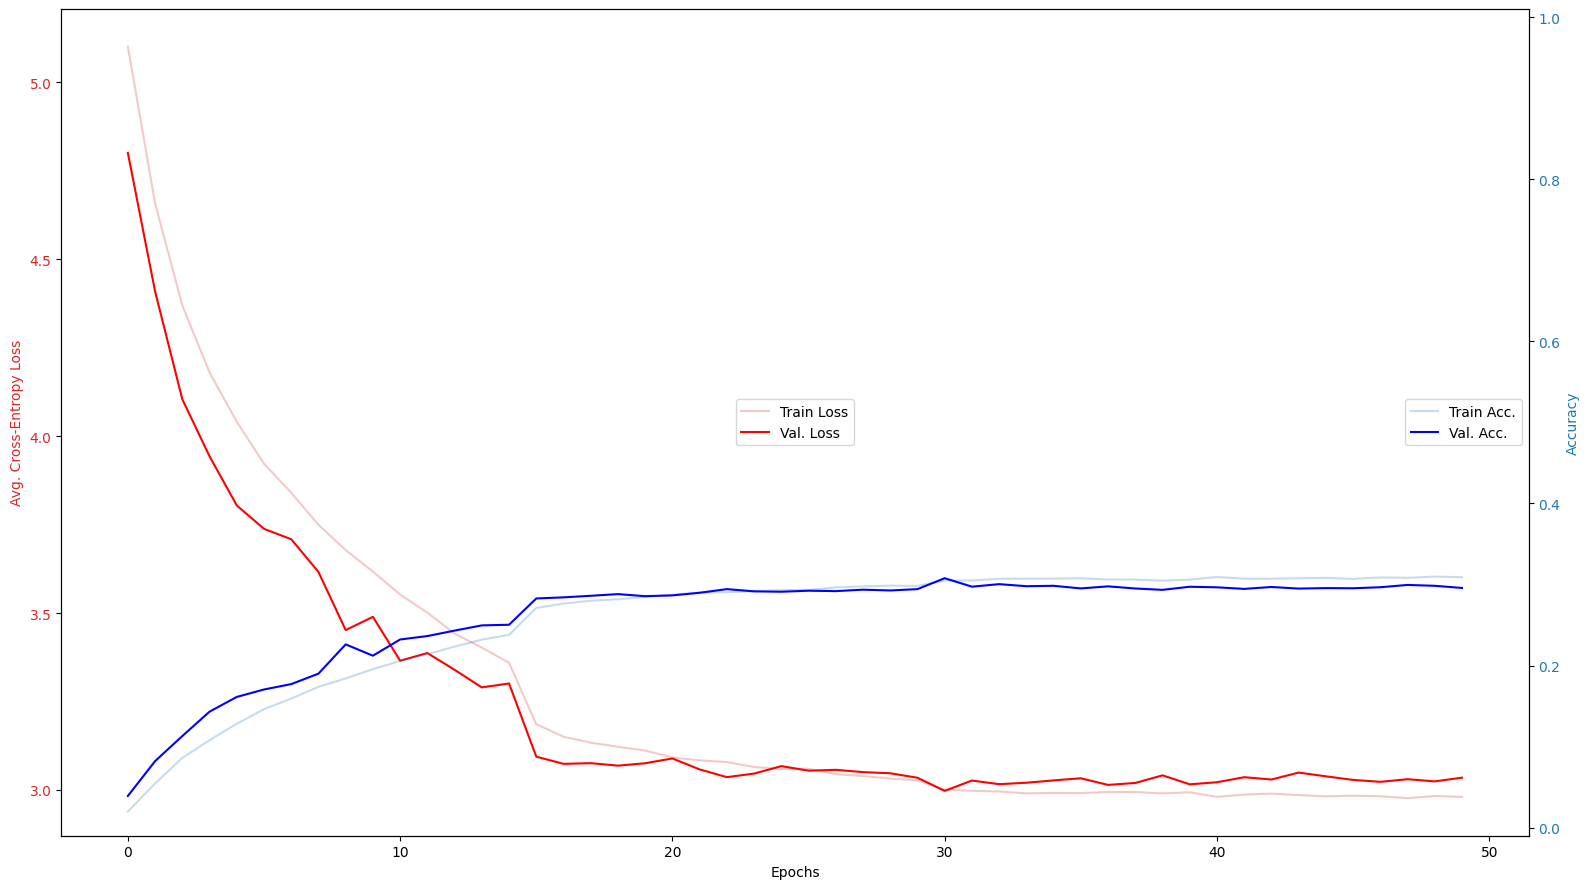

tiny-imagenet_reg_20250311_193604_base_01_nosched_e50_b256/info.json


<Figure size 640x480 with 0 Axes>

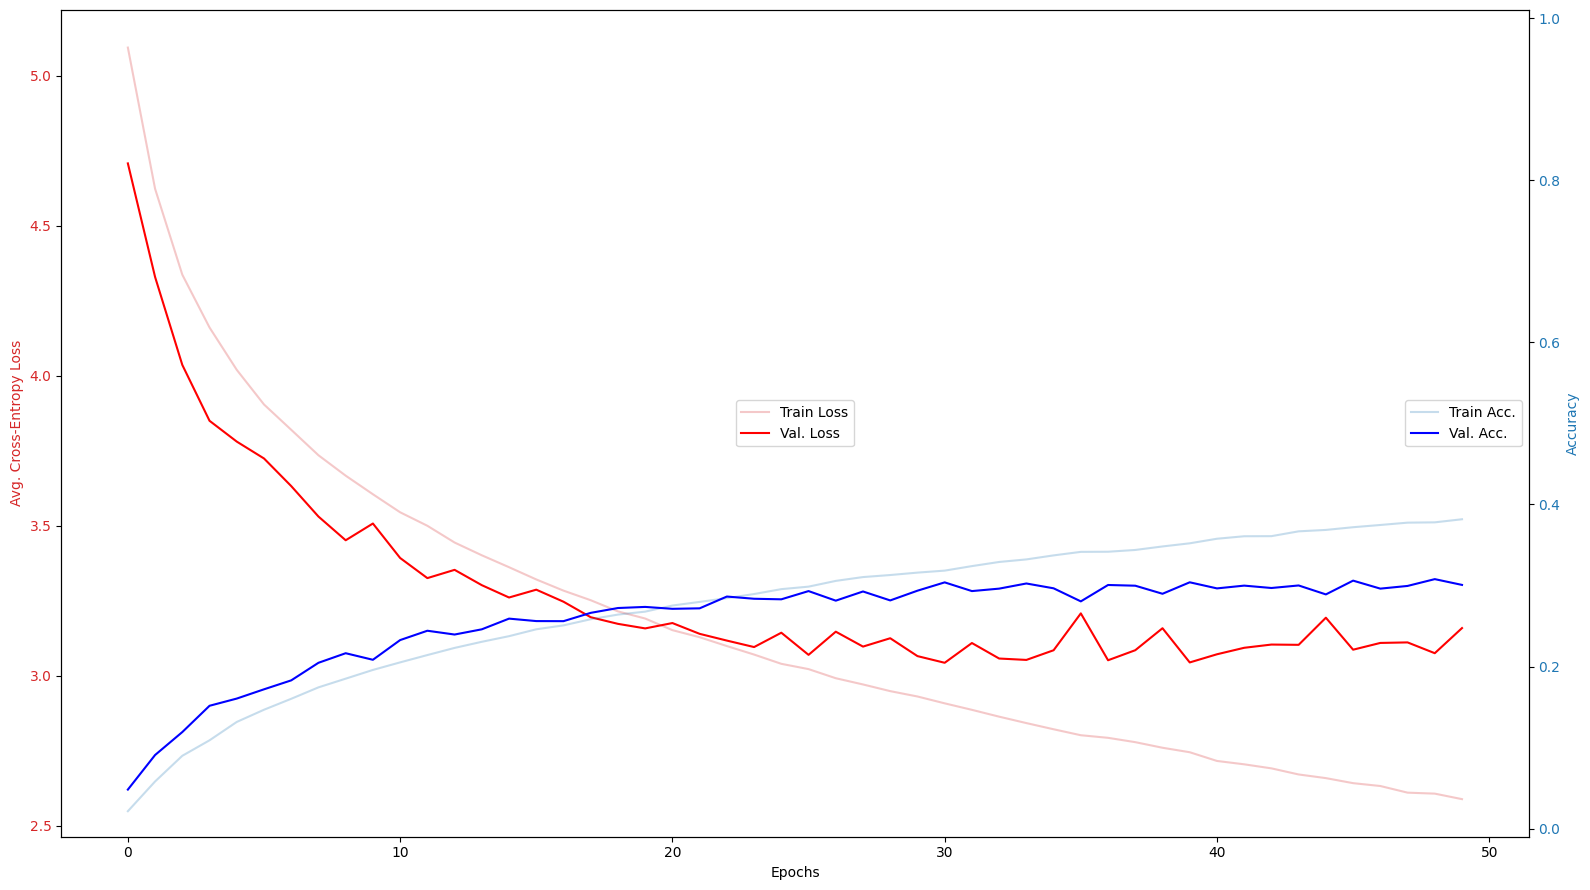

tiny-imagenet_reg_20250311_231605_base_001_sched_b512_e200_sched_lr1_reduce/info.json


<Figure size 640x480 with 0 Axes>

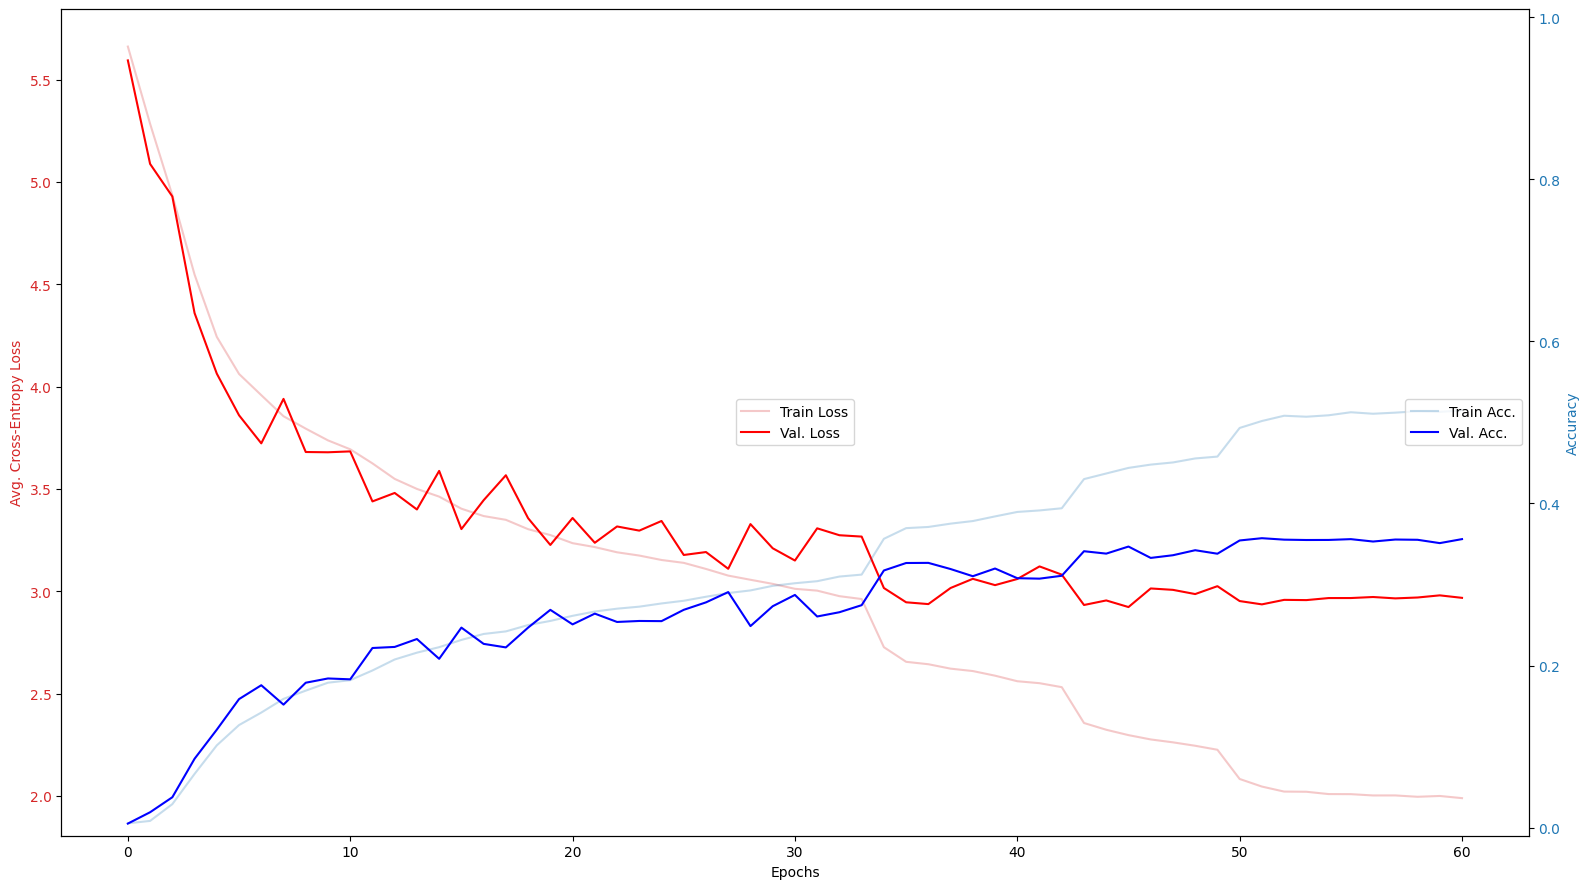

tiny-imagenet_reg_20250311_213012_base_01_sched_b256_e50/info.json


<Figure size 640x480 with 0 Axes>

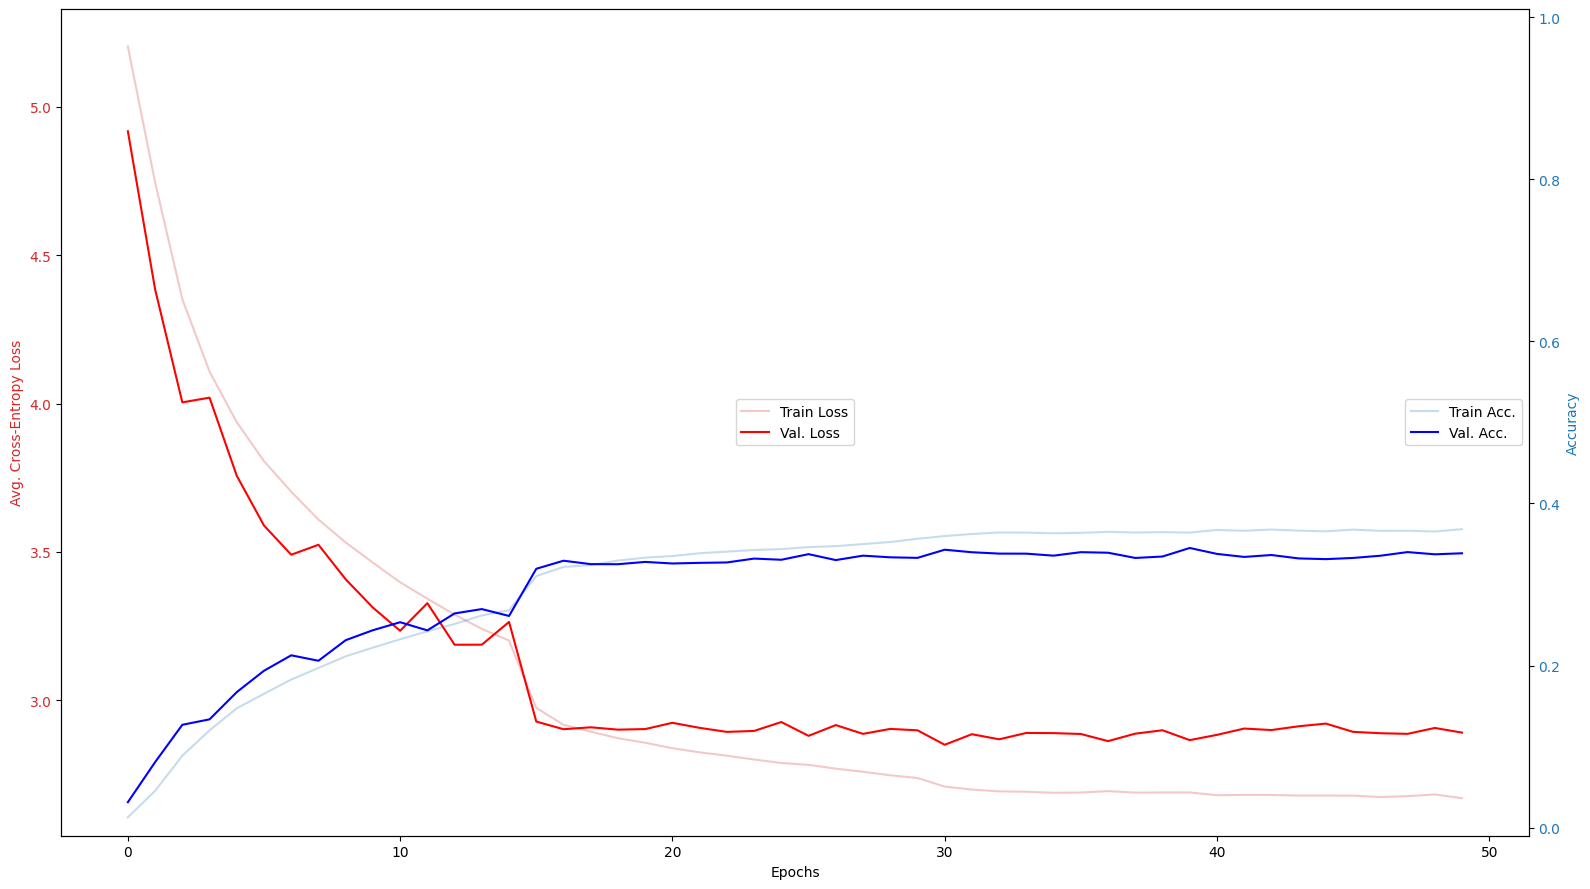

tiny-imagenet_reg_20250311_234236_base_sched_b128_e200_sched_lr1_reduce/info.json


<Figure size 640x480 with 0 Axes>

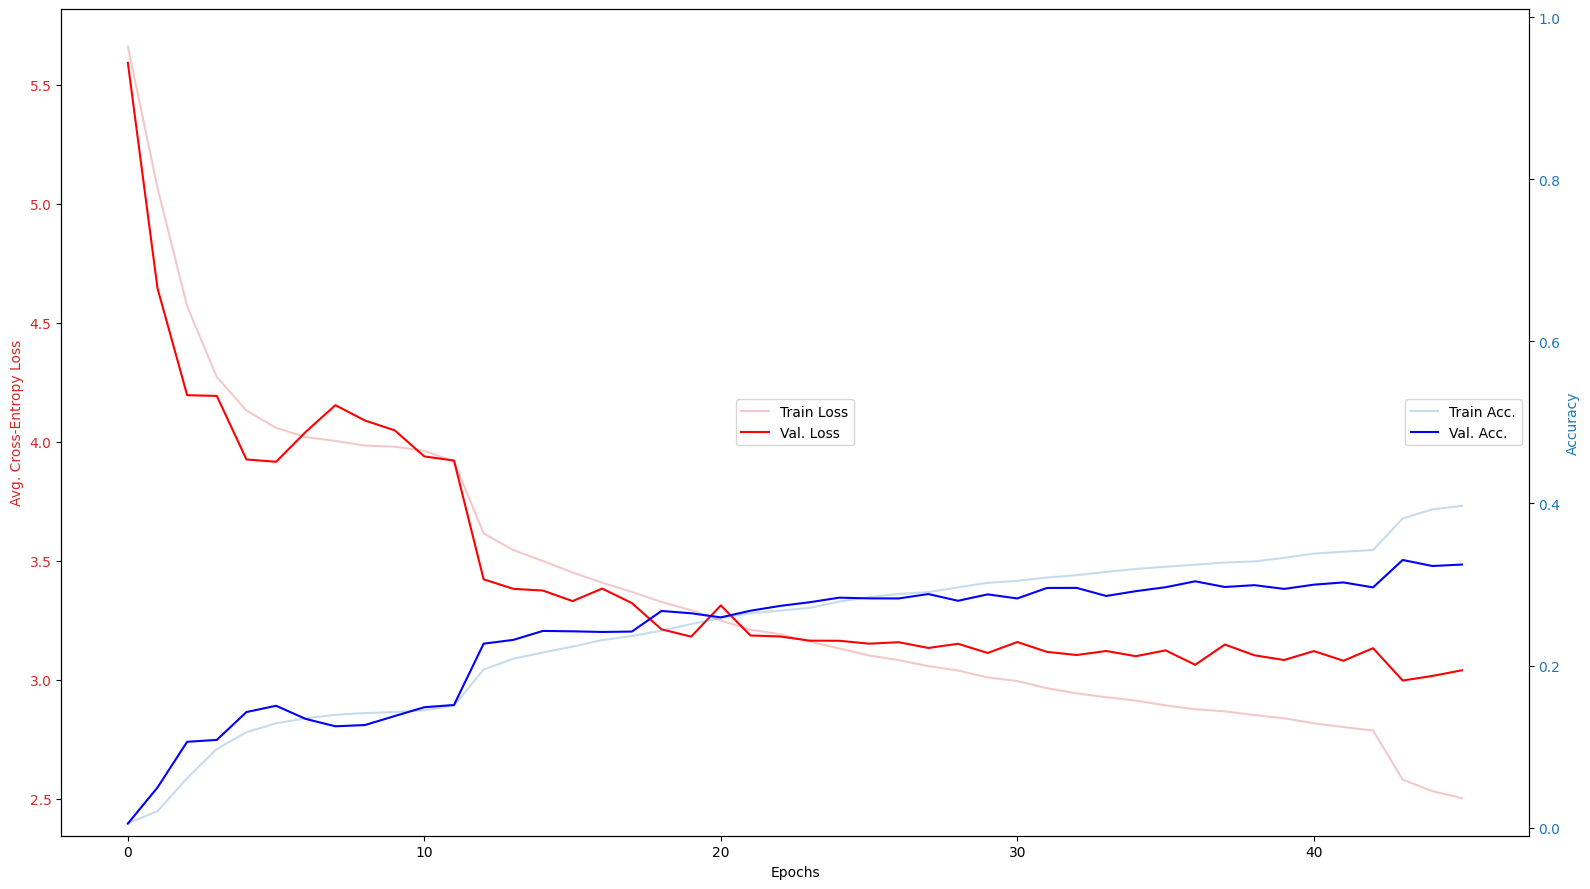

tiny-imagenet_reg_20250312_013030_base_sched_b512_e200_sched_lr001_reduce/info.json


<Figure size 640x480 with 0 Axes>

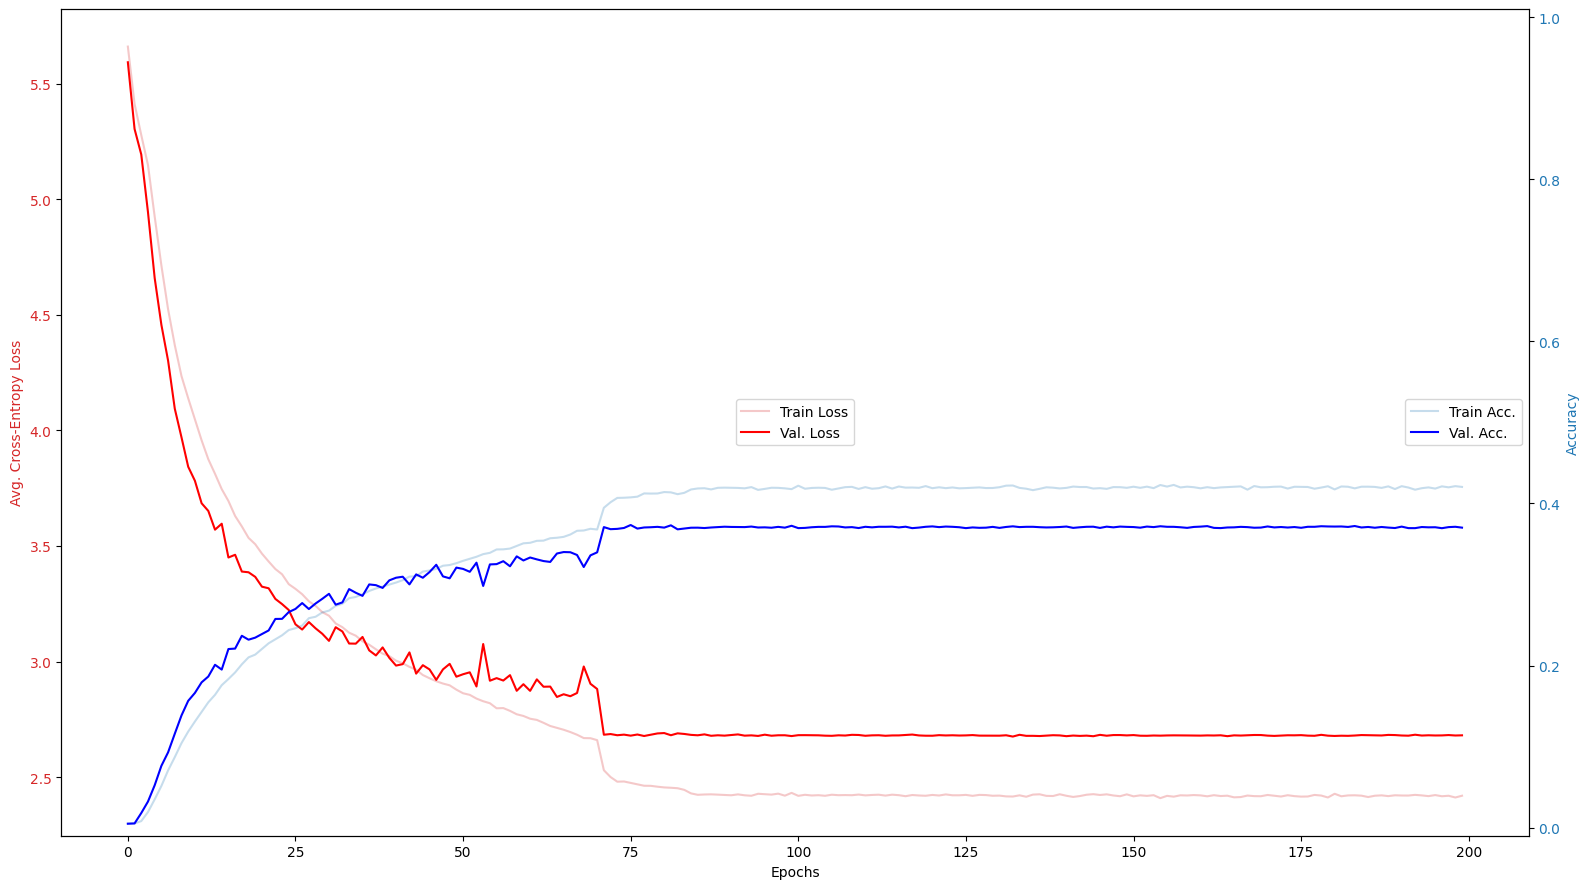

tiny-imagenet_reg_20250312_013058_base_sched_b128_e200_sched_lr1_reduce_sgd/info.json


<Figure size 640x480 with 0 Axes>

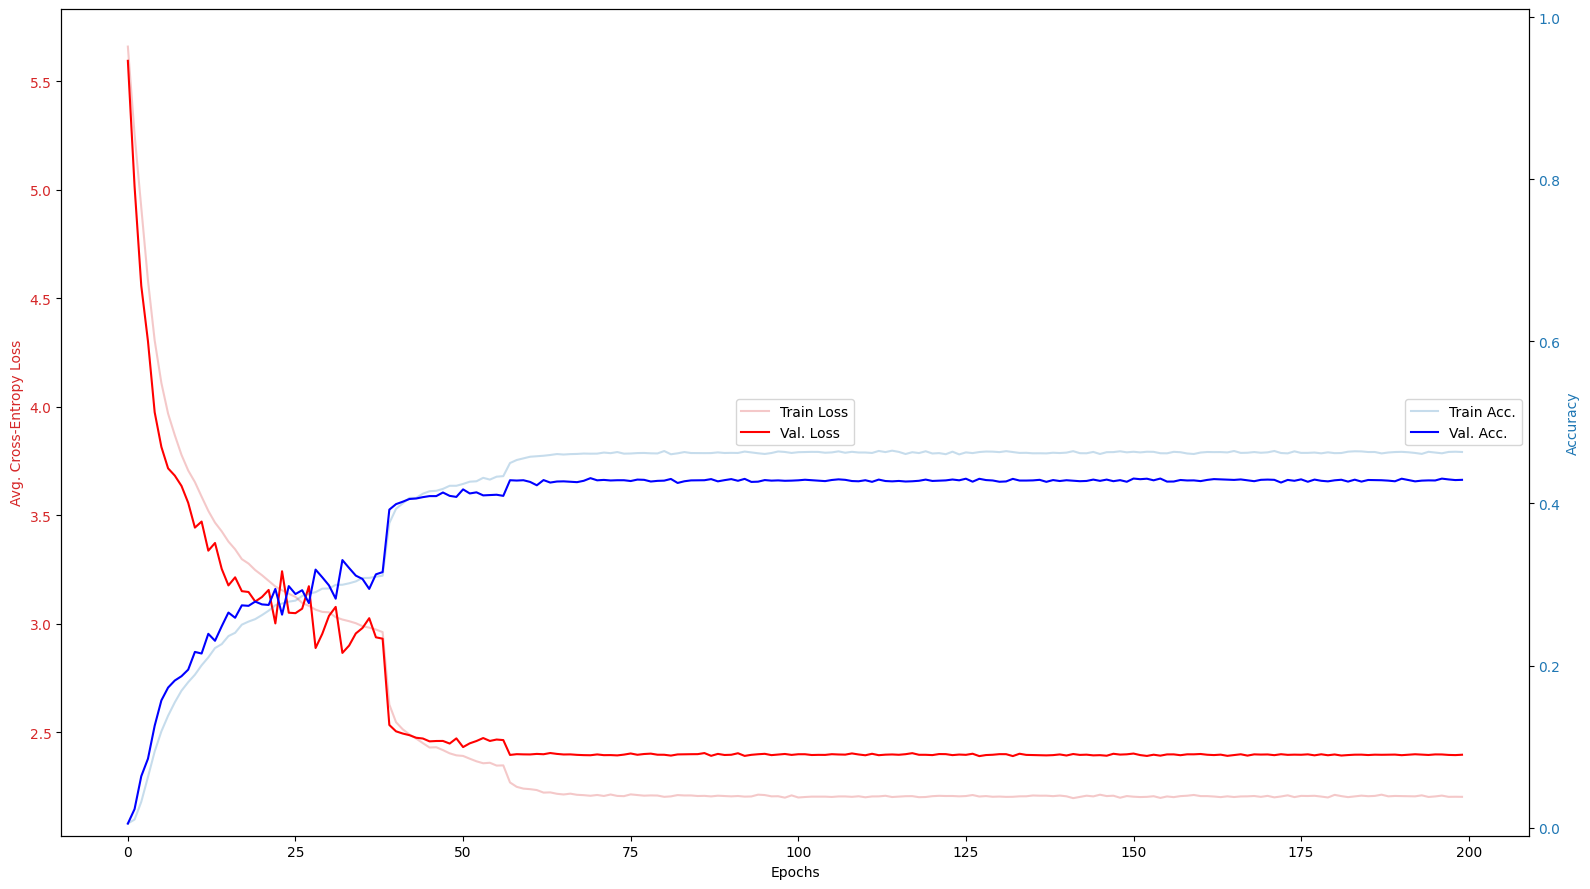

tiny-imagenet_reg_20250312_115905_base_sched_b128_e200_sched_lr1_reduce_sgd_lineardecay/info.json


<Figure size 640x480 with 0 Axes>

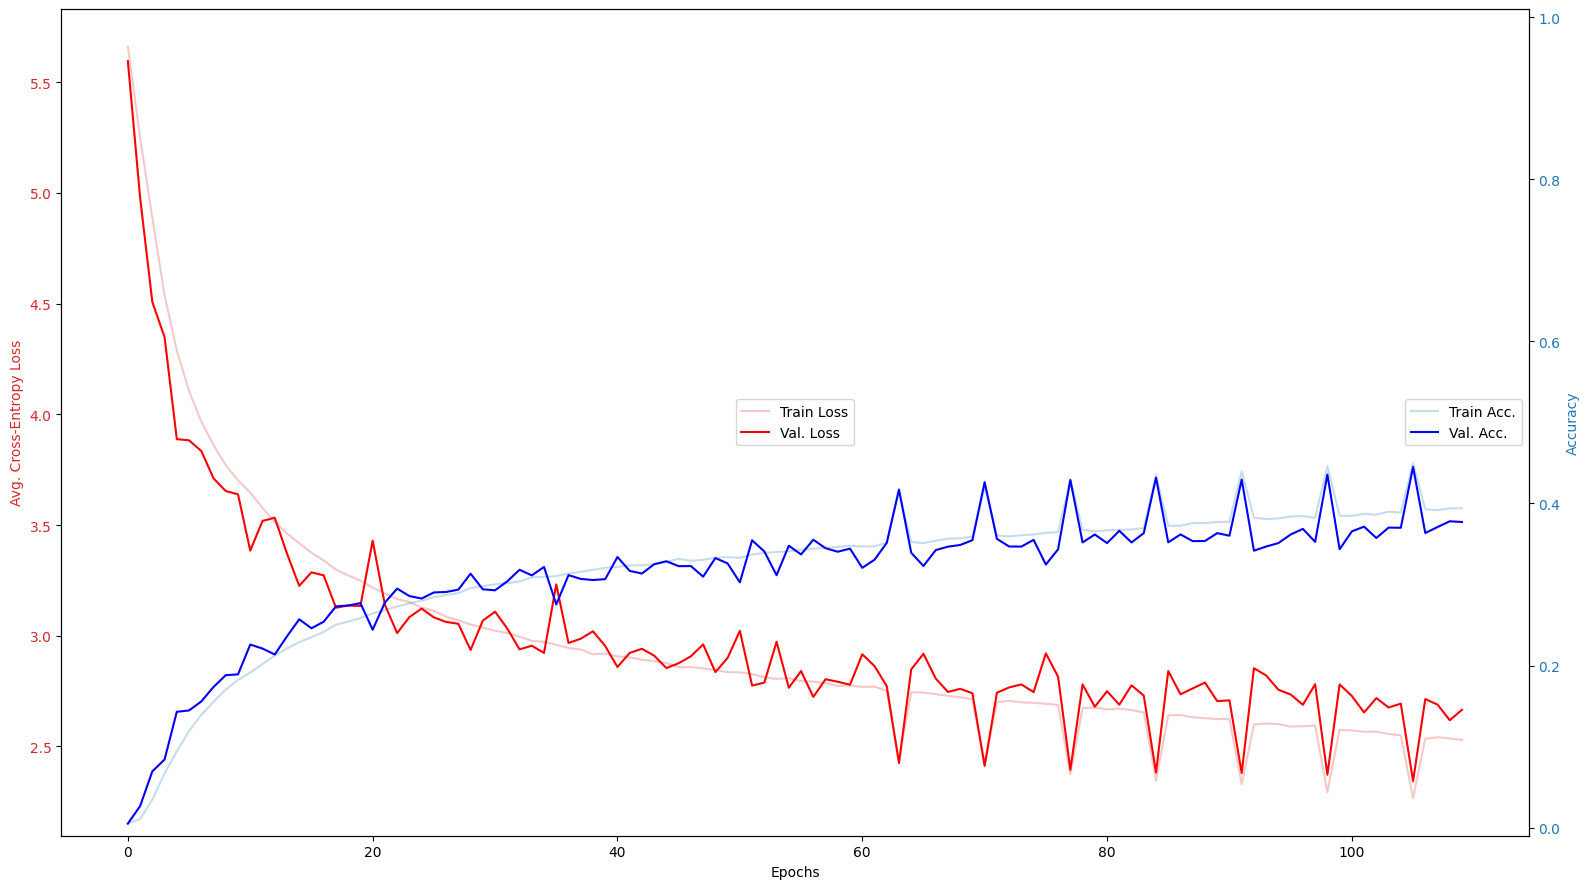

tiny-imagenet_reg_20250312_115941_base_sched_b128_e200_sched_lr1_reduce_sgd_mm/info.json


<Figure size 640x480 with 0 Axes>

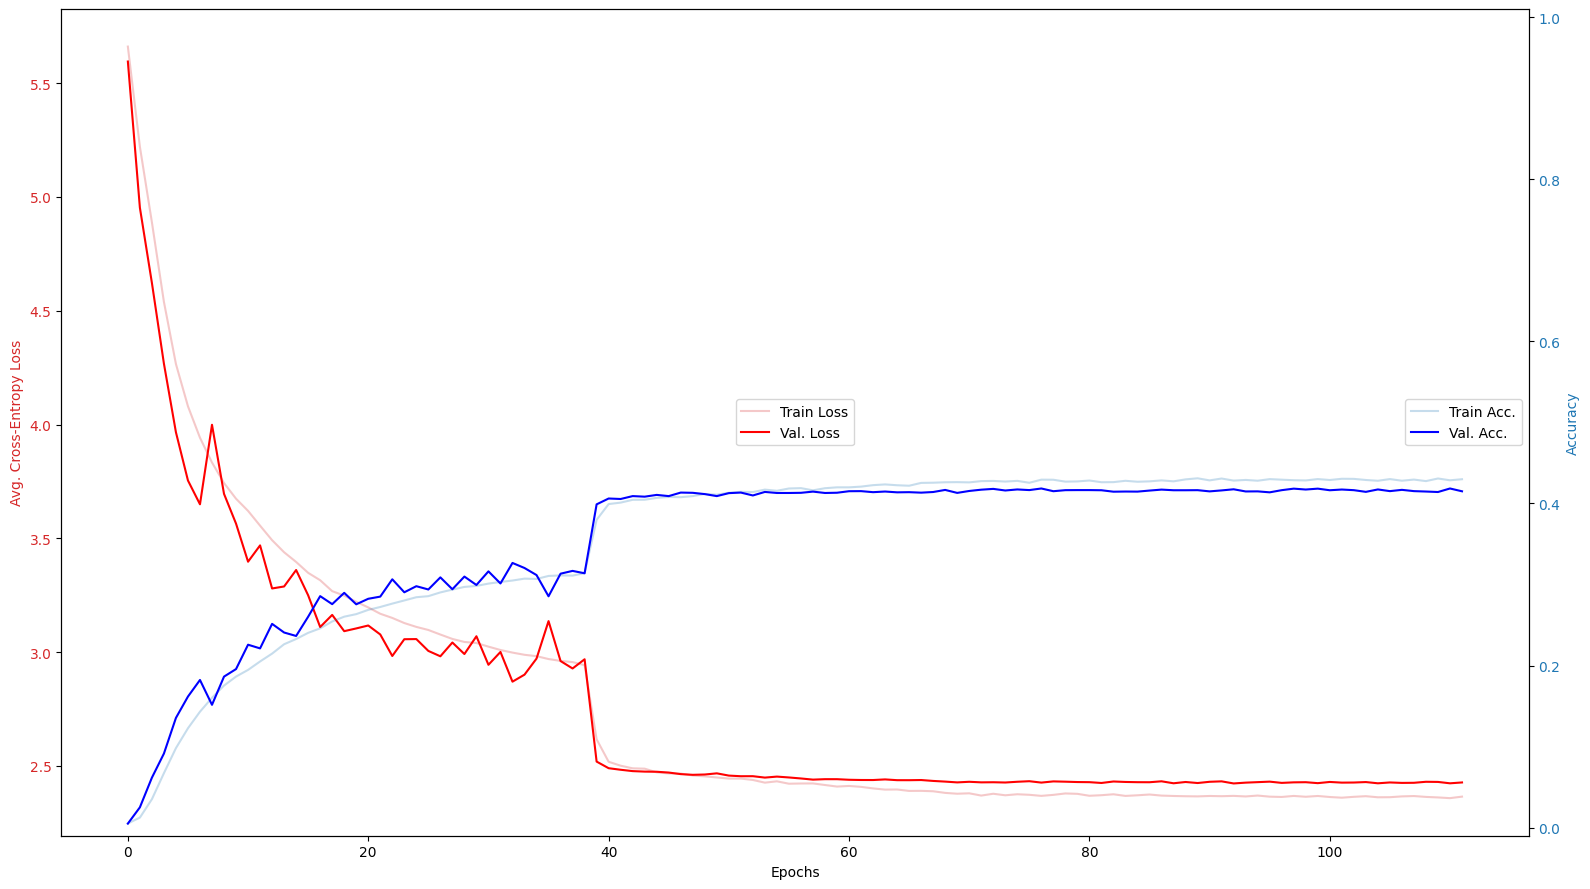

<Figure size 640x480 with 0 Axes>

In [22]:
prefix = "tiny-imagenet_reg"
folders = [folder for folder in os.listdir() if folder.startswith(prefix)]
folders.sort(key=lambda x: os.path.getmtime(x))
for folder in folders:
    print(os.path.join(folder, "info.json"))
    plot_metric_from_folder(os.path.join(folder, "info.json"))